In [27]:
from src.utils import plot_loss, plot_val, Json_writer

In [28]:
log_file = r"C:\Users\saibo\Documents\bachelor_project\outputs\2022-04-06\23-45-06\logs\run.json"
writer = Json_writer(log_file=log_file, reset=False)

In [29]:
loss_train = writer.data['Loss/train']
loss_val = writer.data['Loss/val']
scores = writer.data['Score/val']

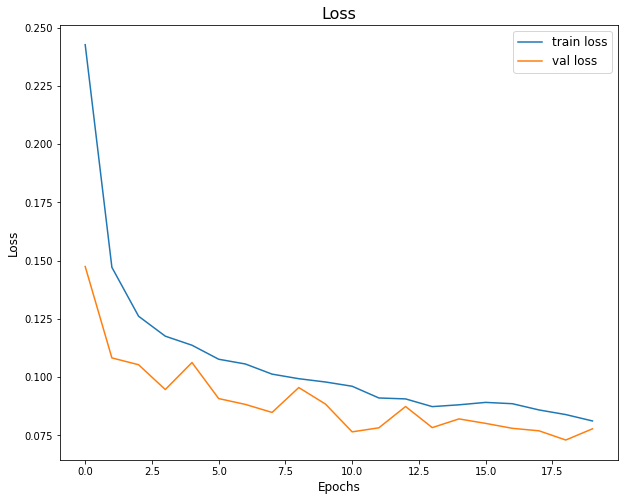

In [30]:
plot_loss(loss_train, loss_val, file_out="../reports/images/loss_mtsd_d_20.png")

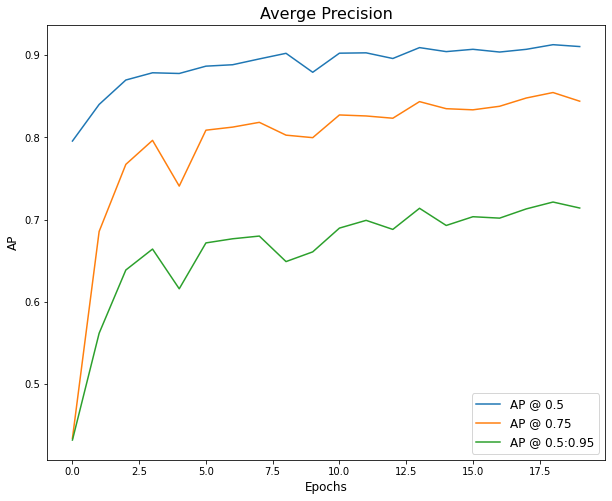

In [31]:
map_50 = scores['map_50']
map_75 = scores['map_75']
map_5095 = scores['map']
labels = ["AP @ 0.5", "AP @ 0.75", "AP @ 0.5:0.95"]
plot_val([map_50, map_75, map_5095], labels, y_label="AP", file_out="../reports/images/val_mtsd_d_20.png")